In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import math
import missingno as msno

# Funciones de Soporte (Helpers)

In [2]:
def map_languages(row) -> pd.Series:
    """
    En este método vamos a emular un OneHot encoding pero a mano.
    Recibe como parámetro el registro y devuelve el nuevo registro actualizado
    """
    # print(row['lenguajes_array'])
    languages = (row['lenguajes_array'])
    errors = 0
    try:
      for l in languages:
        if l != '':
          row[str.lower(l)] = 1
        else:
          errors += 1 # El lenguaje es '' string :(
    except:
      errors += 1

    # print('Count Errors:', errors)
    return row

# Trabajo Final

## Hipótesis

- Pregunta #1: Que salario o rango debería asignarle basado en mis variables?
    - Años de Experiencia / Seniority
    - Tecnologías (Lenguajes de Programación)
    - Lugar de Residencia
    - Dedicación
    - Estudios alcanzados
    - Posición
    - Tipo de Contrato
- Hipotesis #1:

In [3]:
# tomamos el DataSet y hacemos un poco de limpieza
#   -> Renombrar columnas para mejorar su legibilidad
#   -> Removemos algunas columnas que no son necesarios

df_salary = pd.read_csv('./datasets/encuesta-salarial-2024.csv', skiprows=0,
                        thousands=".",
                        decimal=",",)
df_salary.rename(columns={'Unnamed: 0': 'indice', '_sal': 'salario', \
    'lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual': 'lenguajes', \
    'donde_estas_trabajando': 'lugar_residencia', 'trabajo_de': 'posicion'}, inplace=True)
df_salary.drop(columns={'indice'}, inplace=True)

df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 48 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   lugar_residencia                                                                      5490 non-null   object 
 1   dedicacion                                                                            5490 non-null   object 
 2   tipo_de_contrato                                                                      5490 non-null   object 
 3   ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos                             5490 non-null   int64  
 4   ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos                              5214 non-null   float64
 5   pagos_en_dolares                                                                   

In [4]:
# Removemos algunas columnas que no vamos a tener en cuenta
df_salary.drop(columns={
    'bases_de_datos',
    'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    'ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos',
    'pagos_en_dolares',
    'si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron',
    'recibis_algun_tipo_de_bono',
    'a_que_esta_atado_el_bono',
    'tuviste_actualizaciones_de_tus_ingresos_laborales_durante_2024',
    'de_que_fue_el_ajuste_total_acumulado',
    'en_que_mes_fue_el_ultimo_ajuste',
    'como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior',
    'contas_con_beneficios_adicionales',
    'que_tan_conforme_estas_con_tus_ingresos_laborales',
    'estas_buscando_trabajo',
    # 'donde_estas_trabajando',
    'antiguedad_en_la_empresa_actual',
    'cuantas_personas_tenes_a_cargo',
    'plataformas_que_utilizas_en_tu_puesto_actual',
    'frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual',
    'qa_testing',
    'cantidad_de_personas_en_tu_organizacion',
    'modalidad_de_trabajo',
    'si_trabajas_bajo_un_esquema_hibrido_cuantos_dias_a_la_semana_vas_a_la_oficina',
    'en_los_ultimos_6_mesesse_aplico_alguna_politica_de_ajustes_salariales',
    'en_los_ultimos_6_meseshubo_reduccion_de_personal',
    'la_recomendas_como_un_buen_lugar_para_trabajar',
    'que_tanto_estas_usando_copilotchatgpt_u_otras_herramientas_de_ia_para_tu_trabajo',
    'anos_en_el_puesto_actual',
    'salir_o_seguir_contestando',
    'estado',
    'carrera',
    'institucion_educativa',
    'salir_o_seguir_contestando_sobre_las_guardias',
    'tenes_guardias',
    'cuanto_cobras_por_guardia',
    'aclara_el_numero_que_ingresaste_en_el_campo_anterior',
    'salir_o_seguir_contestando_sobre_estudios',
    'tengo_edad',
    'genero',
    'sueldo_dolarizado'
}, inplace=True)

df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   lugar_residencia          5490 non-null   object
 1   dedicacion                5490 non-null   object
 2   tipo_de_contrato          5490 non-null   object
 3   posicion                  5490 non-null   object
 4   anos_de_experiencia       5490 non-null   int64 
 5   lenguajes                 5488 non-null   object
 6   maximo_nivel_de_estudios  2567 non-null   object
 7   seniority                 5490 non-null   object
 8   salario                   5490 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 386.1+ KB


In [5]:
# Categorizar columnas
#   -> Dedicación
#   -> TipoDeContrato
#   -> MaximoNivelDeEstudio
#   -> Seniority
df_salary['dedicacion'] = df_salary['dedicacion'].astype('category')
df_salary['tipo_de_contrato'] = df_salary['tipo_de_contrato'].astype('category')
df_salary['maximo_nivel_de_estudios'] = df_salary['maximo_nivel_de_estudios'].astype('category')
df_salary['seniority'] = df_salary['seniority'].astype('category')
df_salary['lugar_residencia'] = df_salary['lugar_residencia'].astype('category')

df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   lugar_residencia          5490 non-null   category
 1   dedicacion                5490 non-null   category
 2   tipo_de_contrato          5490 non-null   category
 3   posicion                  5490 non-null   object  
 4   anos_de_experiencia       5490 non-null   int64   
 5   lenguajes                 5488 non-null   object  
 6   maximo_nivel_de_estudios  2567 non-null   category
 7   seniority                 5490 non-null   category
 8   salario                   5490 non-null   int64   
dtypes: category(5), int64(2), object(2)
memory usage: 200.0+ KB


In [6]:
# Reemplazo los NaN en MaximoNivelDeEstudios por SecundarioCompleto
df_salary['maximo_nivel_de_estudios'].unique()
df_salary['maximo_nivel_de_estudios'] = df_salary['maximo_nivel_de_estudios'].fillna('Secundario')
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   lugar_residencia          5490 non-null   category
 1   dedicacion                5490 non-null   category
 2   tipo_de_contrato          5490 non-null   category
 3   posicion                  5490 non-null   object  
 4   anos_de_experiencia       5490 non-null   int64   
 5   lenguajes                 5488 non-null   object  
 6   maximo_nivel_de_estudios  5490 non-null   category
 7   seniority                 5490 non-null   category
 8   salario                   5490 non-null   int64   
dtypes: category(5), int64(2), object(2)
memory usage: 200.0+ KB


In [7]:
# Filtramos posiciones relacionadas a desarrollo web

profession_filter = ['Developer', 'Technical Leader', 'Data Engineer', 'Automatizador', \
    'Consultant', 'Data Scientist', 'Architect', 'Engineer', 'Machine Learning Engineer', \
        'Analista Senior en Informatica', 'AI Engineer', 'Operaciones', \
            'Hago desde el análisis y la programación. Diseño de DB, etc', 'Analista Tecnico Funcional', \
                'Ingenieria Electronica', 'Técnico en informática']

df_salary.where(df_salary['posicion'].isin(profession_filter), inplace=True)

# Reindexamos para evitar problemas de índice
df_salary = df_salary.dropna().reset_index(drop=True)
df_salary.tail()


,lugar_residencia,dedicacion,tipo_de_contrato,posicion,anos_de_experiencia,lenguajes,maximo_nivel_de_estudios,seniority,salario
2953,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Data Engineer,5.0,"Bash/Shell, Python, Scala",Universitario,Semi-Senior,2200000.0
2954,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),Developer,4.0,"Bash/Shell, CSS, HTML, Java, Javascript, Scala...",Universitario,Semi-Senior,1700000.0
2955,Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,Developer,5.0,"CSS, HTML, Javascript, TypeScript",Terciario,Semi-Senior,2500000.0
2956,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Technical Leader,30.0,SQL,Secundario,Senior,4000000.0
2957,Buenos Aires,Full-Time,Staff (planta permanente),Developer,5.0,"HTML, Javascript, PHP, Rust, SQL",Secundario,Semi-Senior,1290000.0


In [8]:
# Actualmente los lenguajes de programación vienen en un string separados por coma y espacio (', '); por ende, vamos a separarlos en un array y 
# usarlos como columnas

# Para ello:
# Spliteamos los lenguajes de programación en un array dentro de la columna nueva lenguajes_array
df_salary['lenguajes_array'] = df_salary['lenguajes'] \
    .apply(func=(lambda x: str(x).split(', ')))

# Con este pedazo de código lo que hacemos es crear las columnas de los lenguajes de programación,
# además lo limpiamos un poco
languages_list = df_salary['lenguajes_array'].to_list()

df_languages = pd.DataFrame(languages_list)
unique_languages = pd.unique(np.char.lower(df_languages.stack().to_numpy().tolist()))

df_unique_languages = pd.DataFrame(unique_languages).replace('', np.nan).dropna()
unique_languages_list = pd.unique(np.char.lower(df_unique_languages.stack().to_numpy().tolist()))

lenguages_columns_length = unique_languages_list.shape[0]
lenguages_rows_length = df_salary.shape[0]

languages_df = pd.DataFrame(np.zeros((lenguages_rows_length, lenguages_columns_length)), columns=unique_languages_list)
final_df = pd.concat([df_salary, languages_df], axis=1)

In [9]:
# Aplicamos la función map_languages, que simula un OneHotEncoder a mano
final_df_encoded = final_df.apply(map_languages, axis=1)

# Mostramos un poco los resultados...
final_df_encoded[['lenguajes', 'html', 'javascript', 'c#', 'seniority', 'anos_de_experiencia', 'tipo_de_contrato', 'salario']].head()

# Creo un nuevo CSV con las columnas para verlas mejor y poder elegir cual eliminar y cual no
# df_columns_to_clean = final_df_encoded.columns.to_frame()
# df_columns_to_clean.to_csv('./datasets/coolumns_for_cleaning.csv')

# Elimino nuevamente algunas columnas que considero "no útiles"
final_df_encoded.drop(columns={
    'ninguno de los anteriores',
    'relacionados a salesforce: apex',
    'una poronga',
    'sap pi po is',
    'tal',
    'edi',
    'microsoft excel',
    'openedge abl',
    'soql ',
    'no trabajo con lenguajes sino que realizo diseño de arquitecturas a alto nivel',
    'no hago programacion',
    'wikimedia',
    'actualmente me encuentro entre asignaciones',
    'pero mi perfil en la empresa es de java y angularts',
    'vb .net  y vb .6',
}, inplace=True)

# Vuelvo a Eliminar NaN en caso de que me hayan quedado
final_df_encoded = final_df_encoded.dropna().reset_index(drop=True)


In [10]:
# Considero que ahora tengo un DS listo para trabajar
final_df_encoded.head(20)

,lugar_residencia,dedicacion,tipo_de_contrato,posicion,anos_de_experiencia,lenguajes,maximo_nivel_de_estudios,seniority,salario,lenguajes_array,...,rexx,ssis,graphql,mulesoft,iron python,sqr,vbscript,blue prism,poweshell,classic asp
0,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Developer,3.0,"HTML, Javascript, PHP, TypeScript",Posgrado/Especialización,Semi-Senior,1700000.0,"[HTML, Javascript, PHP, TypeScript]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Buenos Aires,Full-Time,Staff (planta permanente),Technical Leader,3.0,"Javascript, TypeScript",Universitario,Semi-Senior,2000000.0,"[Javascript, TypeScript]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Córdoba,Full-Time,Contractor,Data Engineer,5.0,"C#, Python, R, Scala, SQL",Universitario,Semi-Senior,1000000.0,"[C#, Python, R, Scala, SQL]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Developer,9.0,"CSS, HTML, Javascript, SQL, TypeScript",Secundario,Senior,850000.0,"[CSS, HTML, Javascript, SQL, TypeScript]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,Technical Leader,5.0,".NET, Javascript, TypeScript",Secundario,Semi-Senior,3300000.0,"[.NET, Javascript, TypeScript]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Córdoba,Full-Time,Contractor,Automatizador,0.0,Javascript,Secundario,Junior,450000.0,[Javascript],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Córdoba,Full-Time,Staff (planta permanente),Technical Leader,9.0,"CSS, HTML, Javascript, PHP, Python, SQL, TypeS...",Universitario,Senior,835469.0,"[CSS, HTML, Javascript, PHP, Python, SQL, Type...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Buenos Aires,Full-Time,Contractor,Technical Leader,3.0,"CSS, HTML, Javascript, Python, SQL, TypeScript",Universitario,Semi-Senior,1050000.0,"[CSS, HTML, Javascript, Python, SQL, TypeScript]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Developer,4.0,"CSS, HTML, Javascript, SQL",Secundario,Semi-Senior,860000.0,"[CSS, HTML, Javascript, SQL]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Corrientes,Full-Time,Contractor,Developer,15.0,"Javascript, SQL, TypeScript,",Posgrado/Especialización,Senior,4000000.0,"[Javascript, SQL, TypeScript, ]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

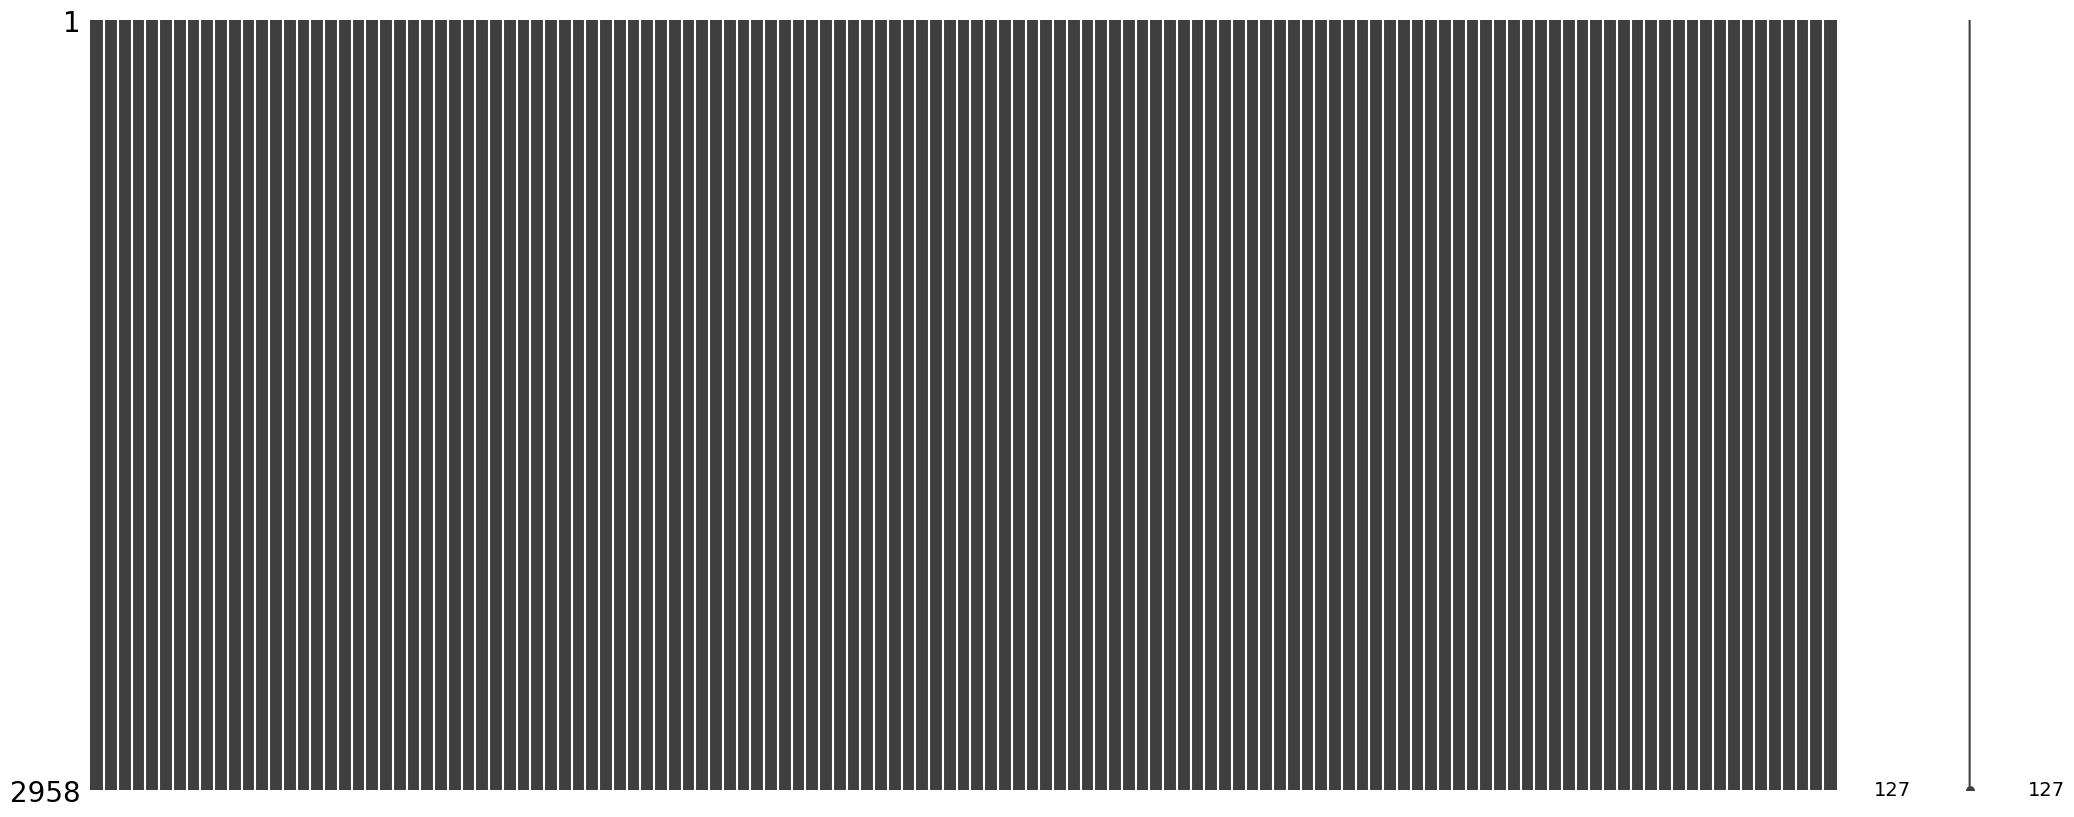

In [19]:
# Mostramos que no hay valores nulos o vacíos
msno.matrix(final_df_encoded)

# Análisis de variables Categóricas

- Por cada variable categórica mostramos los registros por variable y un gráafico


 0   lugar_residencia          5490 non-null   category
 1   dedicacion                5490 non-null   category
 2   tipo_de_contrato          5490 non-null   category
 3   posicion                  5490 non-null   object  
 4   anos_de_experiencia       5490 non-null   int64   
 5   lenguajes                 5488 non-null   object  
 6   maximo_nivel_de_estudios  2567 non-null   category
 7   seniority                 5490 non-null   category

## Lugar de Residencia

In [ ]:
print(final_df_encoded['lugar_residencia'].value_counts())

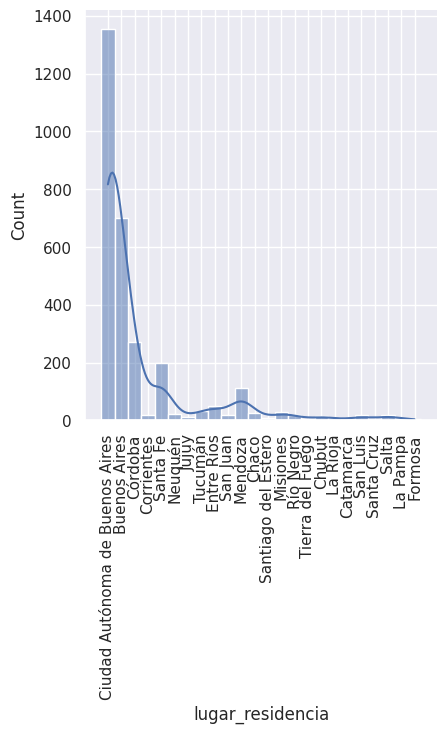

In [42]:
# fig, ax = plt.subplots(figsize=(40, 5))
ax = sns.displot(data=final_df_encoded['lugar_residencia'],  kde=True)
ax.tick_params(axis='x', rotation=90)
plt.show()

## Seniority

In [45]:
print(final_df_encoded['seniority'].value_counts())

seniority
Senior         1295
Semi-Senior    1004
Junior          659
Name: count, dtype: int64


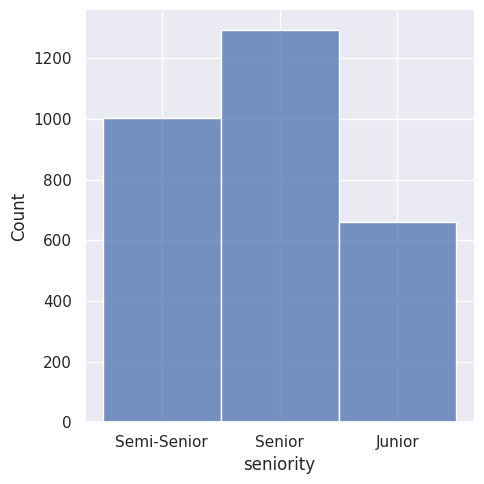

In [48]:
# fig, ax = plt.subplots(figsize=(40, 5))
ax = sns.displot(data=final_df_encoded['seniority'])
# ax.tick_params(axis='x', rotation=90)
plt.show()

## Dedicación

## Tipo de Contrato

## Máximo nivel de Estudio alcanzado